# TP 6 : La Régression Linéaire

Le but du TP est de mettre en oeuvre une régression linéaire sur un exemple jouet puis sur des données réelles. Pour cela, vous aurez besoin des formules du cours pour retrouver les coefficients permettant de calculer une régression linéaire. 

## Ex. 1 : La régression simple

1. Nous donnons les couples d’observations suivantes :

x| 18| 7 | 14| 31| 21|  5| 11| 16| 26| 29
-|---|---|---|---|---|---|---|---|---|---
y| 55| 17| 36| 85| 62| 18| 33| 41| 63| 87


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29, 8])
y=np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87, 2])

2. Tracer le graphique des couples $x$ et $y$. A partir de ce graphe, peut on soupconner une relation linéaire entre les variables $x$ et $y$ ?

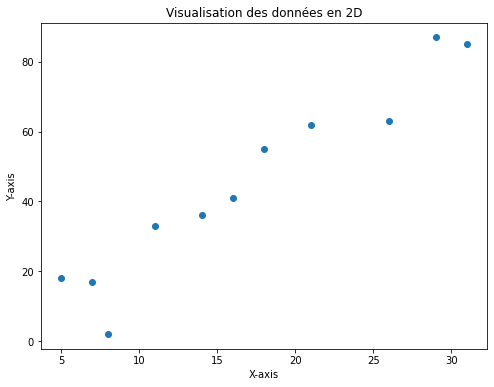

In [4]:
# Créer le plot en 2D
plt.figure(figsize=(8, 6))

# Tracer les points avec une couleur par espèce
plt.scatter(x, y)

# Ajouter des titres et des étiquettes
plt.title('Visualisation des données en 2D')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Afficher le plot
plt.show()

3. Déterminer pour ces observations la droite de régression au sens des moindres carrés. Pour cela il faudra déterminer les coefficients a et b.

In [5]:
## Calcule moyennes
mx = np.mean(x)
my = np.mean(y)

## Calcule cov et var
sxx = np.sum((x-mx)**2)
sxy = (x-mx).T @ (y-my)

## Théorème des moindres carrées
a = sxy/sxx
b = my - a*mx
yp = a*x+b

4. Tracez la droite de régression sur les données.

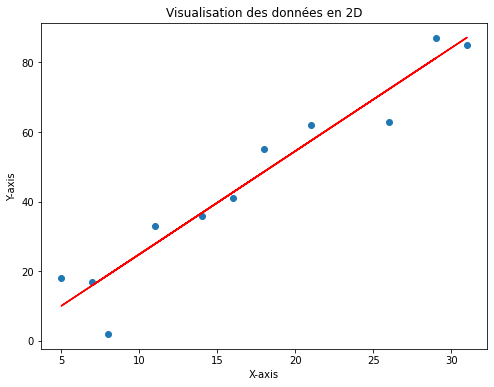

In [6]:
# Créer le plot en 2D
plt.figure(figsize=(8, 6))

# Tracer les points avec une couleur par espèce
plt.scatter(x, y)

# Tracer la ligne de regression
plt.plot(x, yp, color='red', label='Regression line Sk_learn')

# Ajouter des titres et des étiquettes
plt.title('Visualisation des données en 2D')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Afficher le plot
plt.show()

5. Donner une estimation des erreurs $\epsilon_i,i=1,n$

In [6]:
e = y - yp
print("Estimation des erreurs: ", e)

Estimation des erreurs:  [  6.40188806   1.01618341  -0.73836817  -2.14227916   4.50708024
   7.94605529   5.15643965  -1.66824005  -9.31759946   5.78759272
 -16.94875253]


6. Calculer la moyenne empirique et la variance empirique des erreurs. Comparez la variance avec l'estimateur non biaisé de la variance donné par $s_y^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \overline y)^2$

In [7]:
M_imp = 1/len(e) * np.sum(e)
print(M_imp)

Var_imp = 1/len(e) * np.sum((e - M_imp)**2)
print(Var_imp)

Var_non_bias = 1/(len(x)-1) * np.sum((y - np.mean(y))**2)
print(Var_non_bias)

0.0
51.59553730153868
767.8545454545456


7. Donner une estimation plausible de $y$ lorsque $x = 17$. Quel intervalle de confiance associer à cette prédiction ?

In [8]:
import scipy.stats as st 

# Calcul de la prédiction de y lorsque x=17
y_17 = a * 17 + b

print(y_17)

# Écart-type des résidus (ou des erreurs de prédiction)
residuals_std = np.std(e)

# Taille de l'échantillon (nombre d'observations)
n = len(x)

# Calcul de l'erreur standard de la prédiction
prediction_sem = residuals_std / np.sqrt(n)

# Calcul de l'intervalle de confiance pour la prédiction de y lorsque x=17
prediction_interval = st.norm.interval(alpha=0.90, loc=y_17, scale=prediction_sem)

print("Intervalle de confiance pour la prédiction de y lorsque x=17:", prediction_interval)

45.63317599460553
Intervalle de confiance pour la prédiction de y lorsque x=17: (42.07082273502207, 49.19552925418899)


8. a) Donner une estimation plausible de y lorsque x = 48. Quel intervalle de confiance associer à cette prédiction ?

In [9]:
import scipy.stats as st 

# Calcul de la prédiction de y lorsque x=17
y_48 = a * 17 + b

print(y_48)

# Écart-type des résidus (ou des erreurs de prédiction)
residuals_std = np.std(e)

# Taille de l'échantillon (nombre d'observations)
n = len(x)

# Calcul de l'erreur standard de la prédiction
prediction_sem = residuals_std / np.sqrt(n)

# Calcul de l'intervalle de confiance pour la prédiction de y lorsque x=17
prediction_interval = st.norm.interval(alpha=0.90, loc=y_17, scale=prediction_sem)

print("Intervalle de confiance pour la prédiction de y lorsque x=48:", prediction_interval)

45.63317599460553
Intervalle de confiance pour la prédiction de y lorsque x=48: (42.07082273502207, 49.19552925418899)


b) Comparez le avec le précédent


9. Une nouvelle observation nous est fournie : $x_{11} = 48$ et $y_{11} = 2$
    1. Que devient la droite de regression linéaire ?

(12,)
(12,)


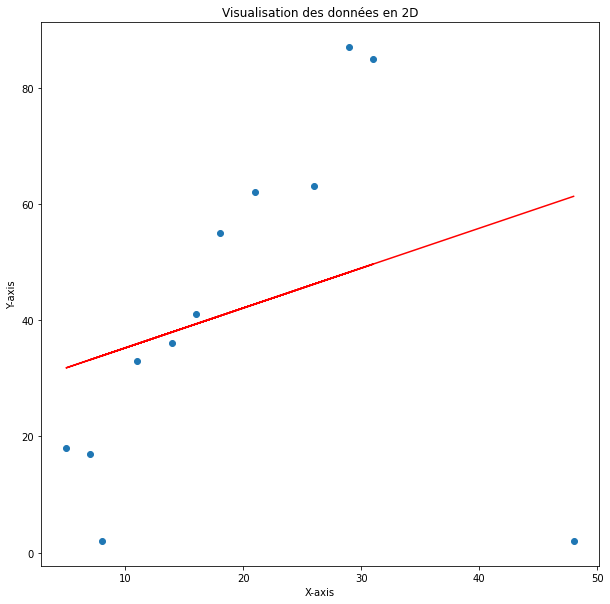

In [12]:
x11 = 48
y11 = 2

new_x= np.append(x,x11)
new_y= np.append(y,y11)

print(new_x.shape)
print(new_y.shape)

## Calcule moyennes
new_mx = np.mean(new_x)
new_my = np.mean(new_y)

## Calcule cov et var
new_sxx = np.sum((new_x-new_mx)**2)
new_sxy = (new_x-new_mx).T @ (new_y-new_my)

## Théorème des moindres carrées
new_a = new_sxy/new_sxx
new_b = new_my - new_a*new_mx
new_yp = new_a*new_x+new_b

# Créer le plot en 2D
plt.figure(figsize=(10, 10))

# Tracer les points avec une couleur par espèce
plt.scatter(new_x, new_y)

# Tracer la ligne de regression
plt.plot(new_x, new_yp, color='red', label='Regression line')

# Ajouter des titres et des étiquettes
plt.title('Visualisation des données en 2D')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Afficher le plot
plt.show()

B. Quelle est l’influence de ce point sur cette droite ?

In [13]:
##Point aberrant, mauvaise influence

## Ex 2 : Régression sur $CO_2$ et température moyenne du globe

Le but de ce second exercice est d'appliquer la régression au sens des moindres carrés sur des données réelles. Ici la variable explicative est le taux de $CO_2$ dans l'atmosphère, et la variable à expliquer la température moyenne à la surface du globe, avec pour référence  à 0 la température moyenne sur la période 1961-1990. 
Les données sont les mêmes que dans le TP4, où nous avons trouvé une corrélation d'environ 0.8. 
Maintenant, nous allons chercher à calculer les estimateurs du modèle linéaire. Il faut donc appliquer tout ce que nous avons vu sur des données jouets, et interprétez ces résultats.

1. Chargez les données contenues dans 'data_global_warming.npz'


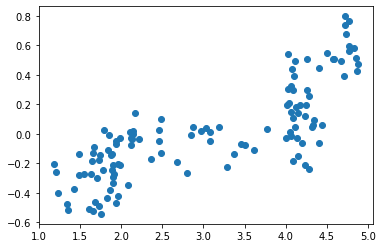

In [14]:
import numpy as np

temp = np.load('temp.npy')
co2 = np.load('co2.npy')

plt.plot(co2,temp,'o')

2. Créez une fonction `regression_fit` calculant les estimateurs $a$ et $b$ donné $x$ et $y$

```python
def regression_fit(x_,y_):
    ...
    return a,b
a,b = regression_fit(co2,temp)
```

In [15]:
def regression_fit(x_,y_):
    
    ## Calcule moyennes
    mx = np.mean(x_)
    my = np.mean(y_)

    ## Calcule cov et var
    sxx = np.sum((x_-mx)**2)
    sxy = (x_-mx).T @ (y_-my)

    ## Théorème des moindres carrées
    a = sxy/sxx
    b = my - a*mx
    
    return a,b

a,b = regression_fit(co2,temp)

3. Créez une fonction `regression_predict` qui calcule l'estimation de $y$ donnés $x$, $a$ et $b$. 

```python
def regression_predict(x_,a_,b_):
    return ...
```

In [16]:
def regression_predict(x_,a_,b_):
    return a_ * x_ + b

4. Créez une fonction `residuals` qui calcule les résidus. Quelles sont les paramètres de cette fonction ? Est ce que les erreurs vous paraissent avoir une distribution gaussienne ?

```python
def residuals(...,...):
    return ...

erreurs = residuals(...)
```

In [17]:
def residuals(y_,yp_):
    return y_ - yp_

erreurs = residuals(temp, regression_predict(co2,a,b))

4. Calculez les valeurs prédites sur l'intervalle \[1,5\] avec un pas de 0.1 et plottez le résultat sur les données.

In [18]:
x_values = np.arange(1, 5.1, 0.1)
predicted_values = regression_predict(x_values, a, b)
print(x_values.shape)
print(predicted_values.shape)

(41,)
(1, 41)


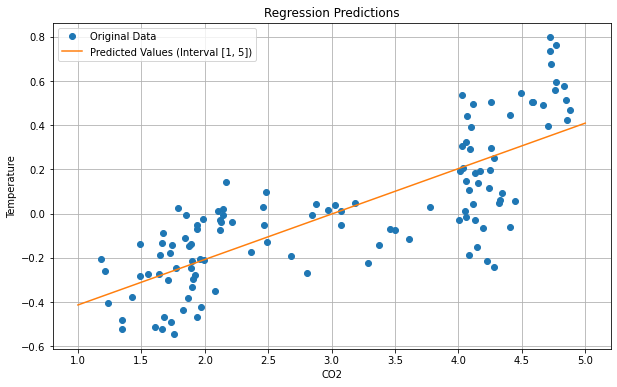

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(co2, temp, 'o', label='Original Data')

plt.plot(x_values, predicted_values.squeeze(), label='Predicted Values (Interval [1, 5])')

plt.xlabel('CO2')
plt.ylabel('Temperature')

plt.title('Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()

5. Affichez la valeur de $a$ et concluez sur la nature de la relation entre $CO_2$ et température.

In [19]:
print(a,b)

[[0.20555681]] [[-0.618338]]


# Différentes manieères de calculer le $R^2$

In [20]:
import numpy as np

def r_squared(y_true, y_pred):
    # Calculate the mean of the true values
    y_true_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_true_mean)**2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred)**2)
    
    # Calculate R-squared
    r2 = 1 - (rss / tss)
    
    return r2

In [22]:
r_sqrt = r_squared(temp,predicted_values.squeeze())
print(r_sqrt)

-64.9206388253779
